In [14]:
%cd /content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)

/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)


## **Task-1**

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [18]:
! pip install python_splitter
import python_splitter
python_splitter.split_from_folder("/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/hand_written_digits", train=0.8, test=0.1, val=0.1)

✅Checking SOURCE directory...
0.8 0.1 0.1
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [29]:
# Set your output folders for train, test, and validation
train_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/train'
test_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/test'
val_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/val'

# Set up data generators
batch_size = 32
image_size = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this based on your problem type
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)



Found 3661 images belonging to 3 classes.
Found 458 images belonging to 3 classes.
Found 459 images belonging to 3 classes.


In [22]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
115/115 [==============================] - 20s 124ms/step - loss: 0.3398 - accuracy: 0.8989 - val_loss: 0.0473 - val_accuracy: 0.9934
Epoch 2/10
115/115 [==============================] - 13s 112ms/step - loss: 0.0622 - accuracy: 0.9833 - val_loss: 0.0443 - val_accuracy: 0.9913
Epoch 3/10
115/115 [==============================] - 14s 122ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.0292 - val_accuracy: 0.9913
Epoch 4/10
115/115 [==============================] - 13s 110ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0272 - val_accuracy: 0.9956
Epoch 5/10
115/115 [==============================] - 14s 120ms/step - loss: 0.0071 - accuracy: 0.9967 - val_loss: 0.0402 - val_accuracy: 0.9956
Epoch 6/10
115/115 [==============================] - 12s 101ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0326 - val_accuracy: 0.9956
Epoch 7/10
115/115 [==============================] - 14s 122ms/step - loss: 3.0454e-04 - accuracy: 1.0000 - val_loss: 0.0409 - va

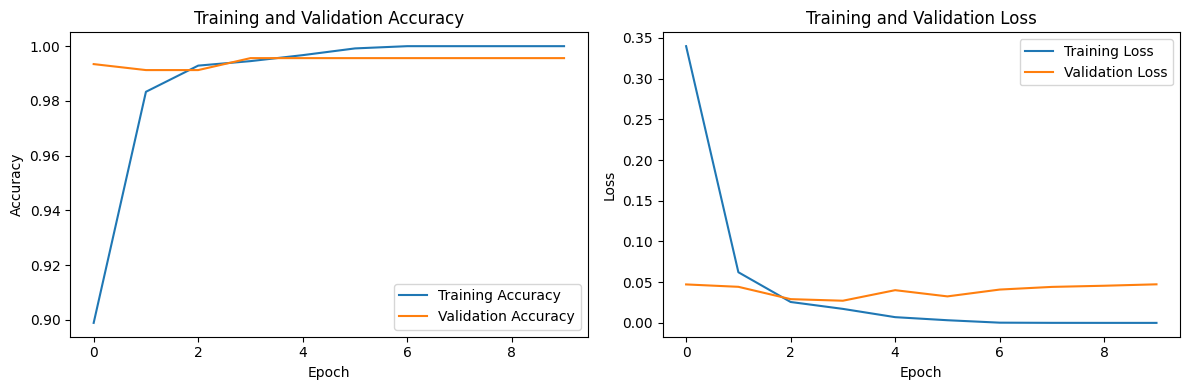

In [24]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [28]:
# Evaluate the model
loss,accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Validation Accuracy:", accuracy)

15/15 [==============================] - 3s 170ms/step - loss: 0.0812 - accuracy: 0.9869
Validation Accuracy: 0.9869281053543091


<ipython-input-30-cd0ba63c58f0>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model.predict_generator(test_generator)


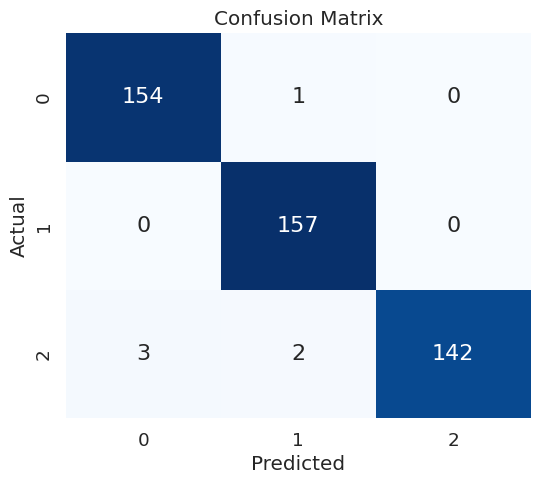

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict_generator(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Task-2**

In [35]:
# Set your output folders for train, test, and validation
train_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/train'
test_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/test'
val_folder = '/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/Train_Test_Folder/val'

# Set up data generators
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this based on your problem type
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)



Found 3661 images belonging to 3 classes.
Found 458 images belonging to 3 classes.
Found 459 images belonging to 3 classes.


In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [37]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/15
115/115 [==============================] - 18s 152ms/step - loss: 0.0223 - accuracy: 0.9940 - val_loss: 0.0385 - val_accuracy: 0.9891
Epoch 2/15
115/115 [==============================] - 17s 144ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 3/15
115/115 [==============================] - 16s 139ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0426 - val_accuracy: 0.9913
Epoch 4/15
115/115 [==============================] - 16s 139ms/step - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 5/15
115/115 [==============================] - 17s 146ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.0458 - val_accuracy: 0.9847
Epoch 6/15
115/115 [==============================] - 17s 144ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 7/15
115/115 [==============================] - 16s 141ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0430 - val_ac

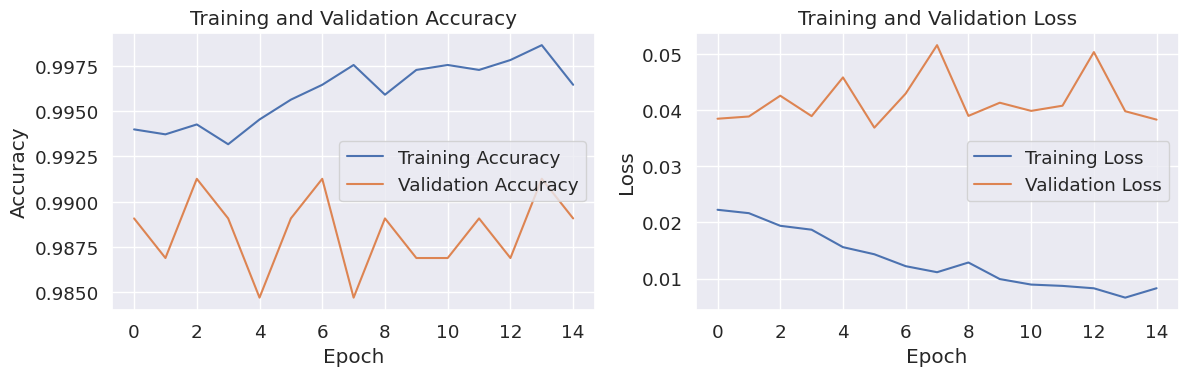

In [42]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [43]:
# Evaluate the model
loss,accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Validation Accuracy:", accuracy)

15/15 [==============================] - 5s 345ms/step - loss: 0.0106 - accuracy: 0.9956
Validation Accuracy: 0.9956427216529846


<ipython-input-44-cd0ba63c58f0>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model.predict_generator(test_generator)


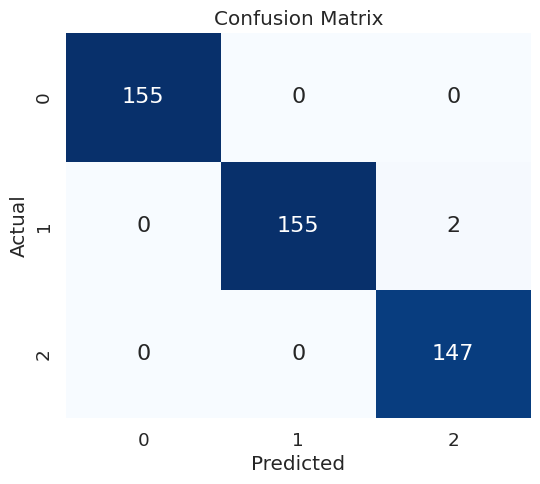

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict_generator(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion:**


  Accuracy from the Method-1 in Task-1 is  0.9869281053543091 while from the Task-2 Transfer Learning Based algorithm is 0.9956427216529846



---



## **Task-3**

In [52]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append((filename, img))
    return images

def extract_features(image, model):
    img = cv2.resize(image, (224, 224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    return features.flatten()

def retrieve_similar_images(query_features, database_features, top_n=4):
    distances = euclidean_distances(query_features.reshape(1, -1), database_features)
    indices = np.argsort(distances)
    top_indices = indices[0][:top_n]
    return top_indices

def main(query_img_index=0):
    # Load pre-trained RESNET-50 model
    model = ResNet50(weights='imagenet', include_top=False)

    # Load images from the query folder
    query_folder = "/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/query_images"
    query_images = load_images_from_folder(query_folder)

    # Load images from the database folder
    database_folder = "/content/drive/MyDrive/Dicecamo-A4/data_assign_2 (1)/images_retreival_local_database"
    database_images = load_images_from_folder(database_folder)

    # Extract features for the query image
    query_image_name, query_image = query_images[query_img_index]
    query_features = extract_features(query_image, model)

    # Extract features for database images
    database_features = np.array([extract_features(img, model) for _, img in database_images])

    # Retrieve similar images
    top_indices = retrieve_similar_images(query_features, database_features)

    # Display the results
    print(f"Query Image: {query_image_name}")
    print("Top 4 Similar Images:")
    for i, index in enumerate(top_indices):
        img_name, _ = database_images[index]
        print(f"{i + 1}. {img_name}")

    # Display the query image and top similar images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")

    for i, index in enumerate(top_indices):
        img_name, img = database_images[index]
        plt.subplot(1, 5, i + 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Similar {i + 1}")
        plt.axis("off")

    plt.show()

### **1. Example**

1/1 [==============================] - 0s 24ms/step
Query Image: 1f06d5b24c.jpg
Top 4 Similar Images:
1. 10a6d3492c.jpg
2. 4c2236afb5.jpg
3. 4c273d12a9.jpg
4. 25e21b4f3e.jpg


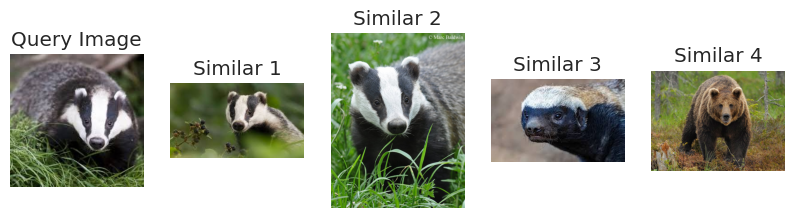

In [53]:
main(query_img_index=0)

### **2. Example**

1/1 [==============================] - 0s 23ms/step
Query Image: 3513bc5551.jpg
Top 4 Similar Images:
1. 6bd95d1776.jpg
2. 11ccf63df4.jpg
3. 6a09b0f37d.jpg
4. 13bc40b533.jpg


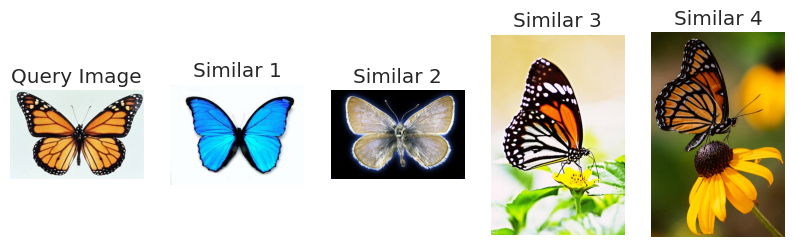

In [54]:
main(query_img_index=1)

### **3. Example**

1/1 [==============================] - 0s 34ms/step
Query Image: 37a1b4de80.jpg
Top 4 Similar Images:
1. 6bd95d1776.jpg
2. 6a09b0f37d.jpg
3. 13bc40b533.jpg
4. 10a6d3492c.jpg


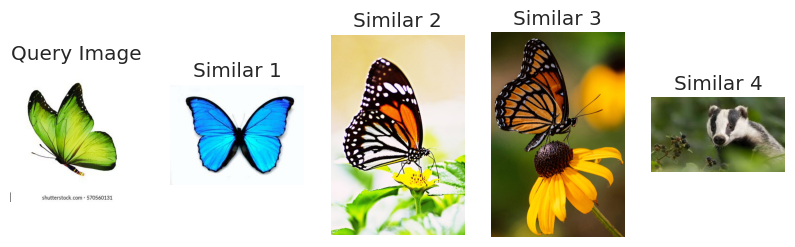

In [55]:
main(query_img_index=2)

### **3. Example**

1/1 [==============================] - 0s 32ms/step
Query Image: 0b30d5c395.jpg
Top 4 Similar Images:
1. 11fe61ae70.jpg
2. 47c9b0d085.jpg
3. 6b69e9e2cd.jpg
4. 39e16108e1.jpg


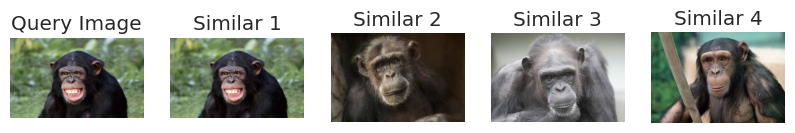

In [56]:
main(query_img_index=3)

### **4. Example**

1/1 [==============================] - 0s 21ms/step
Query Image: 039b2ae790.jpg
Top 4 Similar Images:
1. 22ea4eea68.jpg
2. 25e21b4f3e.jpg
3. 4c273d12a9.jpg
4. 4c2236afb5.jpg


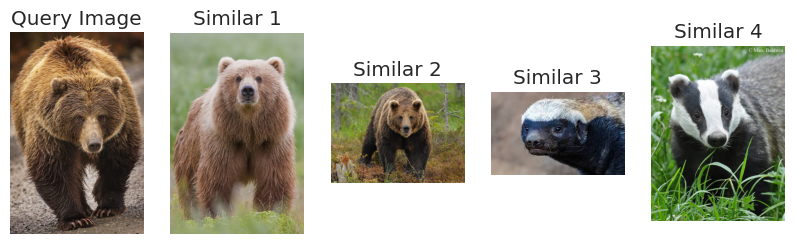

In [57]:
main(query_img_index=4)

### **5. Example**

1/1 [==============================] - 0s 21ms/step
Query Image: 97ac23148b.jpg
Top 4 Similar Images:
1. 47c9b0d085.jpg
2. 6b69e9e2cd.jpg
3. 39e16108e1.jpg
4. 11fe61ae70.jpg


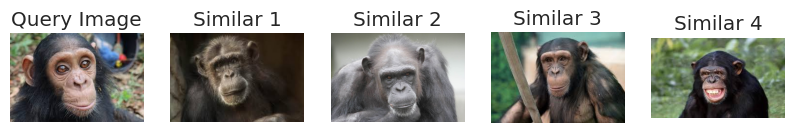

In [58]:
main(query_img_index=5)